In [1]:
import cv2 as cv
import pandas as pd
import os
import numpy as np

In [2]:
# !ls ../data/images/00000-all-frames-512

In [3]:
files = pd.Series(os.listdir('../data/images/00000-all-frames-512'))
files = (
    files
    .rename('filename')
    .to_frame()
)
filename_splitted = files['filename'].str.split('_')
files['video_id'], files['frame'] = filename_splitted.str[0], filename_splitted.str[2].str.strip('.png')
files

,filename,video_id,frame
0,3_frame_106.png,3,106
1,14_frame_123.png,14,123
2,76_frame_46.png,76,46
3,67_frame_119.png,67,119
4,55_frame_86.png,55,86
...,...,...,...
17491,69_frame_11.png,69,11
17492,10_frame_46.png,10,46
17493,33_frame_86.png,33,86
17494,67_frame_100.png,67,100


In [4]:
files.video_id.nunique

<bound method IndexOpsMixin.nunique of 0         3
1        14
2        76
3        67
4        55
         ..
17491    69
17492    10
17493    33
17494    67
17495    45
Name: video_id, Length: 17496, dtype: object>

In [5]:
files['frame'] = files['frame'].astype(int)
teste = files.groupby('video_id').frame.max()

In [6]:
teste.mean(), teste.median()

(173.96, 171.5)

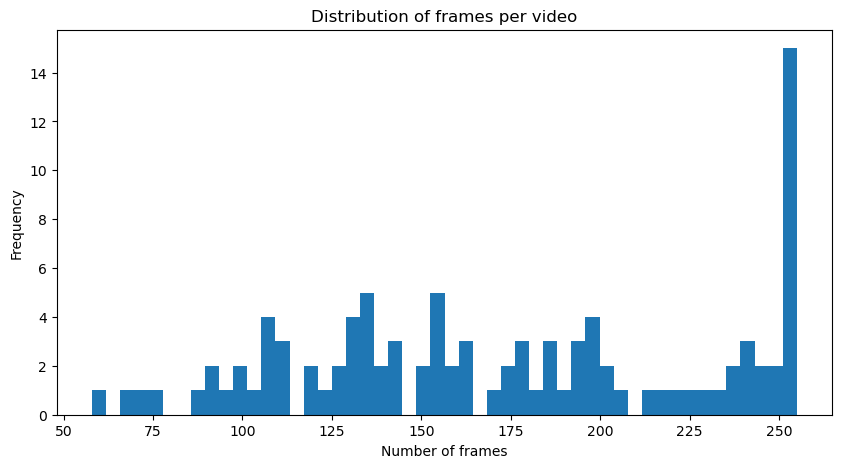

video_id
1      181
10      91
100     74
11     133
12     103
      ... 
95     142
96     229
97     111
98     139
99     134
Name: frame, Length: 100, dtype: int64

In [7]:
teste = files.groupby('video_id').frame.max()
# Plot distribution of frames per video
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(teste, bins=50)
plt.title('Distribution of frames per video')
plt.xlabel('Number of frames')
plt.ylabel('Frequency')
plt.show()
teste

In [8]:
df_frames_pas = pd.read_excel('../data/rotulos/Frames e PAS.xlsx')
df_frames_pas

def normalize_columns_names(columns):
    """
    Normalize the column names of a DataFrame by removing leading/trailing whitespace and converting to lowercase.
    """
    columns = (
        columns
        .str.replace(' ', '_')
        # .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
        .str.lower()
    )
    return columns

df_frames_pas.columns = normalize_columns_names(df_frames_pas.columns)
df_frames_pas = df_frames_pas.rename(columns={
    'frame_de_mxima_constrio_farngea': 'frame_max_constricao',
    'frame_de_repouso': 'frame_repouso',
    'pas_frame': 'pas_frame',
    'pas': 'pas_score',
    'video': 'video_id'
})
df_frames_pas

,video_id,pas_score,pas_frame,frame_max_constricao,frame_repouso
0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,104.0,116
2,2.0,1.0,NaN,66.0,99
3,3.0,1.0,NaN,63.0,96
4,4.0,1.0,NaN,54.0,80
...,...,...,...,...,...
96,96.0,1.0,NaN,92.0,113
97,97.0,1.0,NaN,55.0,87
98,98.0,3.0,41.0,54.0,68
99,99.0,8.0,43.0,51.0,70
